In [8]:
import pm4py
from pm4py.objects.petri_net.obj import PetriNet, Marking
from pm4py.objects.petri_net.utils import petri_utils
from dsplot.graph import Graph

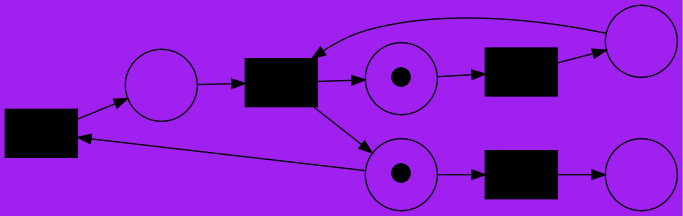

In [9]:
def execute_script():
    net = PetriNet("Task 1")

    p1 = PetriNet.Place("p1")
    p2 = PetriNet.Place("p2")
    p3 = PetriNet.Place("p3")
    p4 = PetriNet.Place("p4")
    p5 = PetriNet.Place("p5")
    
    a = PetriNet.Transition("a")
    b = PetriNet.Transition("b")
    c = PetriNet.Transition("c")
    d = PetriNet.Transition("d")

    net.places.add(p5)
    net.places.add(p1)
    net.places.add(p2)
    net.places.add(p4)
    net.places.add(p3)

    net.transitions.add(a)
    net.transitions.add(c)
    net.transitions.add(b)
    net.transitions.add(d)

    petri_utils.add_arc_from_to(p4, a, net)
    petri_utils.add_arc_from_to(a, p1, net)
    petri_utils.add_arc_from_to(p1, c, net)
    petri_utils.add_arc_from_to(c, p4, net)
    
    petri_utils.add_arc_from_to(p3, b, net)
    petri_utils.add_arc_from_to(b, p2, net)
    petri_utils.add_arc_from_to(p2, c, net)
    petri_utils.add_arc_from_to(c, p3, net)
    
    petri_utils.add_arc_from_to(p4, d, net)
    petri_utils.add_arc_from_to(d, p5, net)

    im = Marking()
    im[p4] = 1
    im[p3] = 1

    fm = Marking()

    pm4py.view_petri_net(net, im, fm, format="png", bgcolor='purple')

    return net


net = execute_script()

In [10]:
graph = Graph({
     "[0,0,1,1,0]": ["[1,0,1,0,0]", "[0,1,0,1,0]", "[0,0,1,0,1]"],
     "[1,0,1,0,0]": ["[1,1,0,0,0]"],
     "[0,1,0,1,0]": ["[1,1,0,0,0]", "[0,1,0,0,1]"],
     "[0,0,1,0,1]": ["[0,1,0,0,1]"],
     "[1,1,0,0,0]": ["[0,0,1,1,0]"],
     "[0,1,0,0,1]": []
    }, directed=True,
       edges={
        '[0,0,1,1,0][1,0,1,0,0]': 'a', '[0,0,1,1,0][0,1,0,1,0]':'b', '[0,0,1,1,0][0,0,1,0,1]': 'd',
        '[1,0,1,0,0][1,1,0,0,0]': 'b',
        '[0,1,0,1,0][1,1,0,0,0]': 'a', '[0,1,0,1,0][0,1,0,0,1]': 'd',
        '[0,0,1,0,1][0,1,0,0,1]': 'b',
        '[1,1,0,0,0][0,0,1,1,0]':'c'
   })

graph.plot()

# Характеристики
### Ограниченность:
Сеть ограничена, причем максимальное количество меток в любой позиции сети 1. Т.е. K=1
### Безопасность:
Сеть безопасна, т.к. K=1.
### Сохраняемость:
Сеть консервативна, т.к. в процессе функционирования общее число маркеров в сети Петри остается постоянным.
### Достижимость:
Сеть живая, т.к. есть возможность срабатывания любого перехода при функционировании моделируемого объекта
### Устойчивость:
Не устойчива - при входных условиях переход необязательно сработает
## Сеть со свободным выбором
Если позиция является входной для нескольких переходов, то для всех них она является единственной входной позицией.
### Простая
Простая - каждый переход имеет не более одной общей позиции с другими переходами
### Не автоматная
Не автоматная - не для каждого перехода найдется только один вход и один выход
### Не маркированная
Одна из позиций имеет более одного входа и не более одного выхода (p4).
### Конфликтная
Конфликтная - переходы [0,0,1,1,0] и [1,0,1,0,0] конфликтуют за ресурс в p3

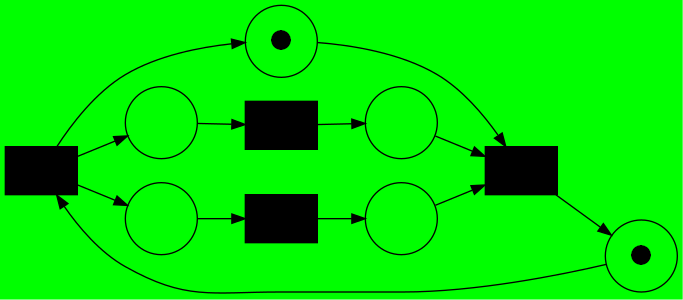

In [11]:
def execute_script():
    net = PetriNet("Task 2")

    p1 = PetriNet.Place("p1")
    p2 = PetriNet.Place("p2")
    p3 = PetriNet.Place("p3")
    p4 = PetriNet.Place("p4")
    p5 = PetriNet.Place("p5")
    p6 = PetriNet.Place("p6")

    t1 = PetriNet.Transition("t1")
    t2 = PetriNet.Transition("t2")
    t3 = PetriNet.Transition("t3")
    t4 = PetriNet.Transition("t4")

    net.places.add(p1)
    net.places.add(p2)
    net.places.add(p3)
    net.places.add(p4)
    net.places.add(p5)
    net.places.add(p6)

    net.transitions.add(t1)
    net.transitions.add(t2)
    net.transitions.add(t3)
    net.transitions.add(t4)

    petri_utils.add_arc_from_to(p1, t1, net)
    petri_utils.add_arc_from_to(t1, p2, net)
    petri_utils.add_arc_from_to(t1, p6, net)
    petri_utils.add_arc_from_to(p6, t4, net)
    petri_utils.add_arc_from_to(t1, p3, net)

    petri_utils.add_arc_from_to(p2, t2, net)
    petri_utils.add_arc_from_to(t2, p4, net)
    petri_utils.add_arc_from_to(p4, t4, net)

    petri_utils.add_arc_from_to(p3, t3, net)
    petri_utils.add_arc_from_to(t3, p5, net)
    petri_utils.add_arc_from_to(p5, t4, net)

    petri_utils.add_arc_from_to(t4, p1, net)

    im = Marking()
    im[p1] = 1
    im[p6] = 1

    fm = Marking()

    pm4py.view_petri_net(net, im, fm, format="png", bgcolor='green')

    return net


net = execute_script()

In [12]:
graph = Graph({
     "[1,0,0,0,0,1]": ["[0,1,1,0,0,2]"],
     "[0,1,1,0,0,2]": ["[0,0,1,1,0,2]","[0,1,0,0,1,2]"],
     "[0,0,1,1,0,2]": ["[0,0,0,1,1,2]"],
     "[0,1,0,0,1,2]": ["[0,0,0,1,1,2]"],
     "[0,0,0,1,1,2]": ["[1,0,0,0,0,1]"],
    }, directed=True,
    edges = {
        '[1,0,0,0,0,1][0,1,1,0,0,2]': 't1',
        '[0,1,1,0,0,2][0,0,1,1,0,2]': 't2','[0,1,1,0,0,2][0,1,0,0,1,2]': 't3',
        '[0,0,1,1,0,2][0,0,0,1,1,2]': 't3',
        '[0,1,0,0,1,2][0,0,0,1,1,2]': 't2',
        '[0,0,0,1,1,2][1,0,0,0,0,1]': 't4'
    })

graph.plot()

# Характеристики
### Ограниченность:
Сеть ограничена, причем максимальное количество меток в любой позиции сети 2. Т.е. K=2
### Безопасность:
Сеть небезопасна, т.к. K=2.
### Сохраняемость:
Сеть консервативна, т.к. в процессе функционирования общее число маркеров в сети Петри остается постоянным.
### Достижимость:
Сеть живая, т.к. есть возможность срабатывания любого перехода при функционировании моделируемого объекта
### Устойчивость:
Устойчива - при входных условиях переход обязательно сработает
## Сеть со свободным выбором
Если позиция является входной для нескольких переходов, то для всех них она является единственной входной позицией.
### Простая
Простая - каждый переход имеет не более одной общей позиции с другими переходами
### Не автоматная
Не автоматная - не для каждого перехода найдется только один вход и один выход
### Маркированная
Каждая позиция имеет не более одного входа и не более одного выхода.
### Неконфликтная
Нет конфликтов за ресурсы